## HELP International Clustering Assignment

## Approach:

### Based on the business problem and looking at the dataset, I will be following the below approach to solve this problem.

#### Check for missing value, and treatment.
#### Check for outlier and treatment.
#### Perform the basic EDA to find the variablity and distribution of the data, so as to identify if we need to scale the data.
#### Data Scaling if necessary.
#### Use Silhouette and Elbow method to validate the optimal cluster values.
#### Use K-Means Cluster method to build the cluster model.
#### Using Hierarchical clustering method to build the cluster model.
#### Analyse the cluster that is representing the countries that will solve the Business Problem.

### Importing the Libraries & Read the data

In [110]:
import numpy as np
import pandas as pd
import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

#Visualizations:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline
from pylab import rcParams

In [111]:
df = pd.read_csv('Country-data.csv')

In [112]:
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

### Analyzing the data

In [113]:
df.shape

(167, 10)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


### Analyzing Statistical Parameters

In [115]:
df.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

#### Statistical analysis tells us that there is variablity in the data, and will require scaling before model building.

### Cleaning the data and Outlier Inspection

In [116]:
#Inspecting Missing values in the dataset.

df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

#### Note: There are no missing values here

### Checking Duplicates

In [117]:
# Checking for duplicates and dropping the entire duplicate row if any
df.drop_duplicates(subset=None, inplace=True)

In [118]:
# Shape after dropping duplicates
df.shape

(167, 10)

#### There seems to be NO DUPLICATE values in the dataset, since the shape before and after drop duplicate is same.

### Data Transformation

#### In our dataframe, the 'imports', 'exports' and 'health' variables seem to be in percentage of GDP per capita, and this can sometimes give a incorrect insight in our EDA. for example, the health spending of 'United states' is 17.9 and that of 'Sierra Leone' is '13.1', both of which are very close to each other in health spending in terms of their % of GDP per capita. But these figures do not actually tell us the real story of how rich and poor are 'USA' and 'Sierra Leone' is. So the best way to tackle it is to convert the % values to ABSOLUTE values

In [119]:
# Converting imports, exports and health spending percentages to absolute values.

df['imports'] = df['imports'] * df['gdpp']/100
df['exports'] = df['exports'] * df['gdpp']/100
df['health'] =  df['health'] * df['gdpp']/100

df.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

### Outlier Treatment

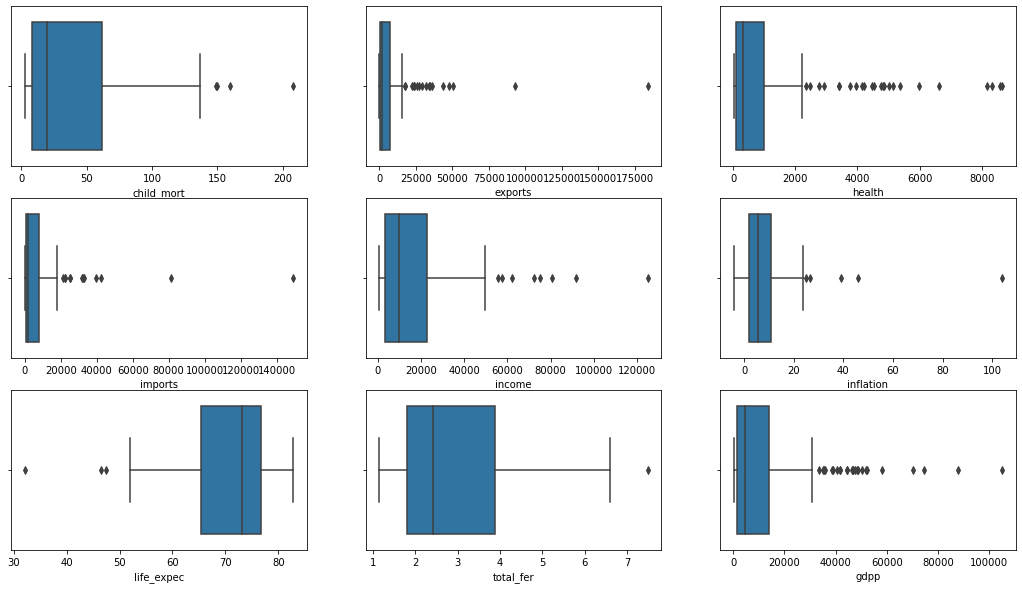

In [120]:
plt.figure(figsize=(18, 10))
plt.subplot(3, 3, 1)
sns.boxplot(df.child_mort)
plt.subplot(3, 3, 2)
sns.boxplot(df.exports)
plt.subplot(3, 3, 3)
sns.boxplot(df.health)
plt.subplot(3, 3, 4)
sns.boxplot(df.imports)
plt.subplot(3, 3, 5)
sns.boxplot(df.income)
plt.subplot(3, 3, 6)
sns.boxplot(df.inflation)
plt.subplot(3, 3, 7)
sns.boxplot(df.life_expec)
plt.subplot(3, 3, 8)
sns.boxplot(df.total_fer)
plt.subplot(3, 3, 9)
sns.boxplot(df.gdpp)
plt.show()

#### NOTE: The outliers seem to be in every single variable. This is a very delicate situation in terms of Business problem statement & Clustering analysis. - If we apply outlier treatment by CAPPING this will change the ranking of few countries with respect to requirement of Financial Aid. Also we will still have some outliers present after Capping, so its not a wise decision in this business scenario. - If we apply outlier treatment by Deletion based on IQR values, this will remove few countries from the list that would have really deserved the Financial Aid. - If we do not apply Outlier treatment, it can impact the clustering model, as the presence of Outlier can change the CENTROID (K-Means) of the cluster.

#### We see that these critical variables gdpp, income and inflation have real high outliers. However let's not remove outliers from inflation as this might lead to a loss in country details which are not doing well- socio-economically(countries with direst need of aid).

In [121]:
df.set_index('country',inplace = True)

#### Let us handle column gdpp initially:

In [122]:
Q1 = df.gdpp.quantile(0.05)
Q3 = df.gdpp.quantile(0.95)
#IQR = Q3-Q1
df_new = df[(df.gdpp <= Q3)]

In [123]:
df_new.describe(percentiles=[.25,.5,.75,.90,.95,.99])

child_mort       exports       health       imports        income  \
count  158.000000    158.000000   158.000000    158.000000    158.000000   
mean    40.196203   4930.901567   781.770539   4672.041152  14614.955696   
std     40.622685   9588.714789  1316.883524   8370.829584  15224.031790   
min      2.600000      1.076920    12.821200      0.651092    609.000000   
25%     10.300000    428.284500    67.989000    536.700000   3290.000000   
50%     20.900000   1634.595000   273.188000   1823.400000   9790.000000   
75%     62.500000   5629.750000   812.497500   5872.430000  20100.000000   
90%    103.100000  12796.470000  2246.874000  11676.000000  36200.000000   
95%    116.450000  18553.680000  3968.045000  15773.450000  41415.000000   
99%    154.300000  32987.598000  5243.796000  32783.304000  73433.000000   
max    208.000000  93200.000000  8663.600000  81084.000000  80600.000000   

        inflation  life_expec   total_fer          gdpp  
count  158.000000  158.000000  158.000000    158.000000  
mean     8.099367   69.966456    3.009620   9913.379747  
std     10.759661    8.780099    1.533079  12717.283188  
min     -4.210000   32.100000    1.150000    231.000000  
25%      1.935000   64.150000    1.810000   1310.000000  
50%      5.460000   71.850000    2.530000   4480.000000  
75%     11.175000   76.400000    4.200000  12075.000000  
90%     16.850000   80.030000    5.346000  31670.000000  
95%     21.125000   80.960000    5.912000  41815.000000  
99%     42.081000   82.301000    6.567200  47115.000000  
max    104.000000   82.800000    7.490000  48400.000000

#### Note: We see that most of the outliers have been handled just by handling gdpp column.

In [124]:
df_new.shape

(158, 9)

### Data Visualization

#### Visualising Distribution
#### Let's make a pairplot of all the numeric variables

In [125]:
#pairplot of numerical variables
plt.figure(figsize = (4,4))
sns.pairplot(df_new)
plt.show()

<Figure size 288x288 with 0 Axes>

### Let's look at the Distribution spread of these features:

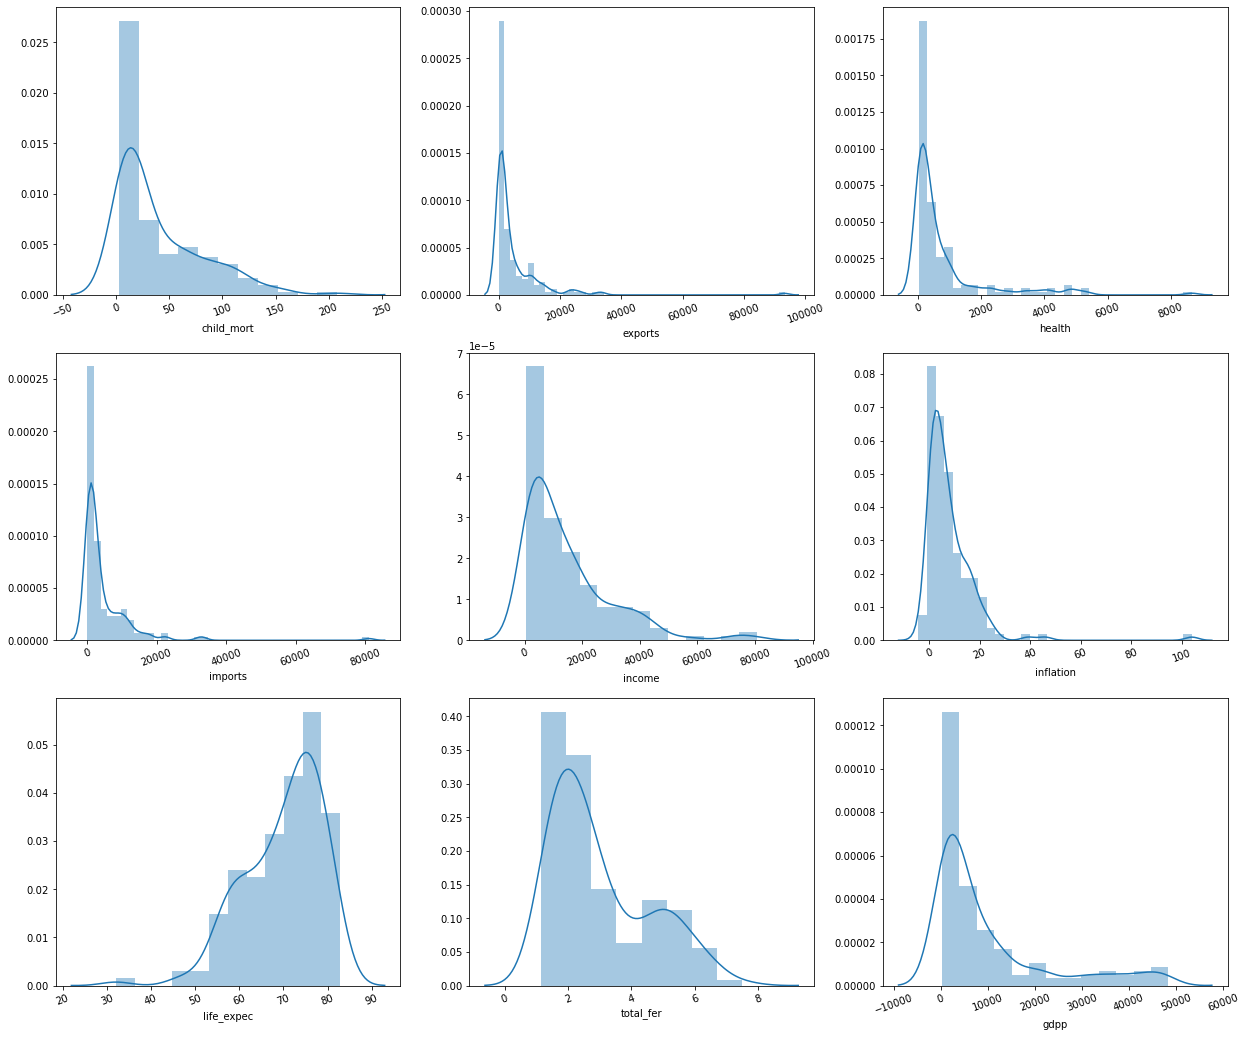

In [126]:
plt.figure(figsize=(21, 18))
features = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(features):
    ax = plt.subplot(3, 3, i[0]+1)
    sns.distplot(df_new[i[1]])
    plt.xticks(rotation=20)

#### Insight: - Most of the data point are 'NOT Normally' distributed. - Their variance is also different. - Their range is also different. All the above points indicate the need of standardising the data before we build the model. Since we need to compute the Euclidean distance between the data points, it is important to ensure that the attributes with a larger range of values do not out-weight the attributes with smaller range. Thus, scaling down of all attributes to the same normal scale is important here.

### Scaling the data 
      
      We will use Standardisation method for scaling the data.

In [127]:
# instantiate
scaler = StandardScaler()

# fit_transform
df_scaled = scaler.fit_transform(df_new)
df_scaled.shape

(158, 9)

In [128]:
df_scaled

array([[ 1.2348468 , -0.51008966, -0.56360764, ..., -1.57290118,
         1.83898931, -0.73837646],
       [-0.58270965, -0.39606338, -0.39146172, ...,  0.7236459 ,
        -0.88967589, -0.45936668],
       [-0.3184725 , -0.33669732, -0.45386166, ...,  0.74649712,
        -0.07827425, -0.4301799 ],
       ...,
       [-0.41725274, -0.4171968 , -0.5272808 , ...,  0.35802647,
        -0.69336904, -0.6786619 ],
       [ 0.39768425, -0.4747592 , -0.54384653, ..., -0.28180754,
         1.08647972, -0.6786619 ],
       [ 1.05951187, -0.45935901, -0.53003083, ..., -2.05277669,
         1.56415972, -0.66682942]])

In [129]:
#Converting the scaled array into a dataframe

df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
df_scaled.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.234847 -0.510090 -0.563608 -0.530152 -0.856955   0.124994   -1.572901   
1   -0.582710 -0.396063 -0.391462 -0.321693 -0.308713  -0.336520    0.723646   
2   -0.318473 -0.336697 -0.453862 -0.392076 -0.113006   0.745941    0.746497   
3    1.946065 -0.285794 -0.518900 -0.378423 -0.574267   1.333323   -1.127302   
4   -0.738289  0.064875 -0.035126  0.301255  0.295540  -0.620888    0.780774   

   total_fer      gdpp  
0   1.838989 -0.738376  
1  -0.889676 -0.459367  
2  -0.078274 -0.430180  
3   2.061470 -0.503541  
4  -0.575585  0.180376

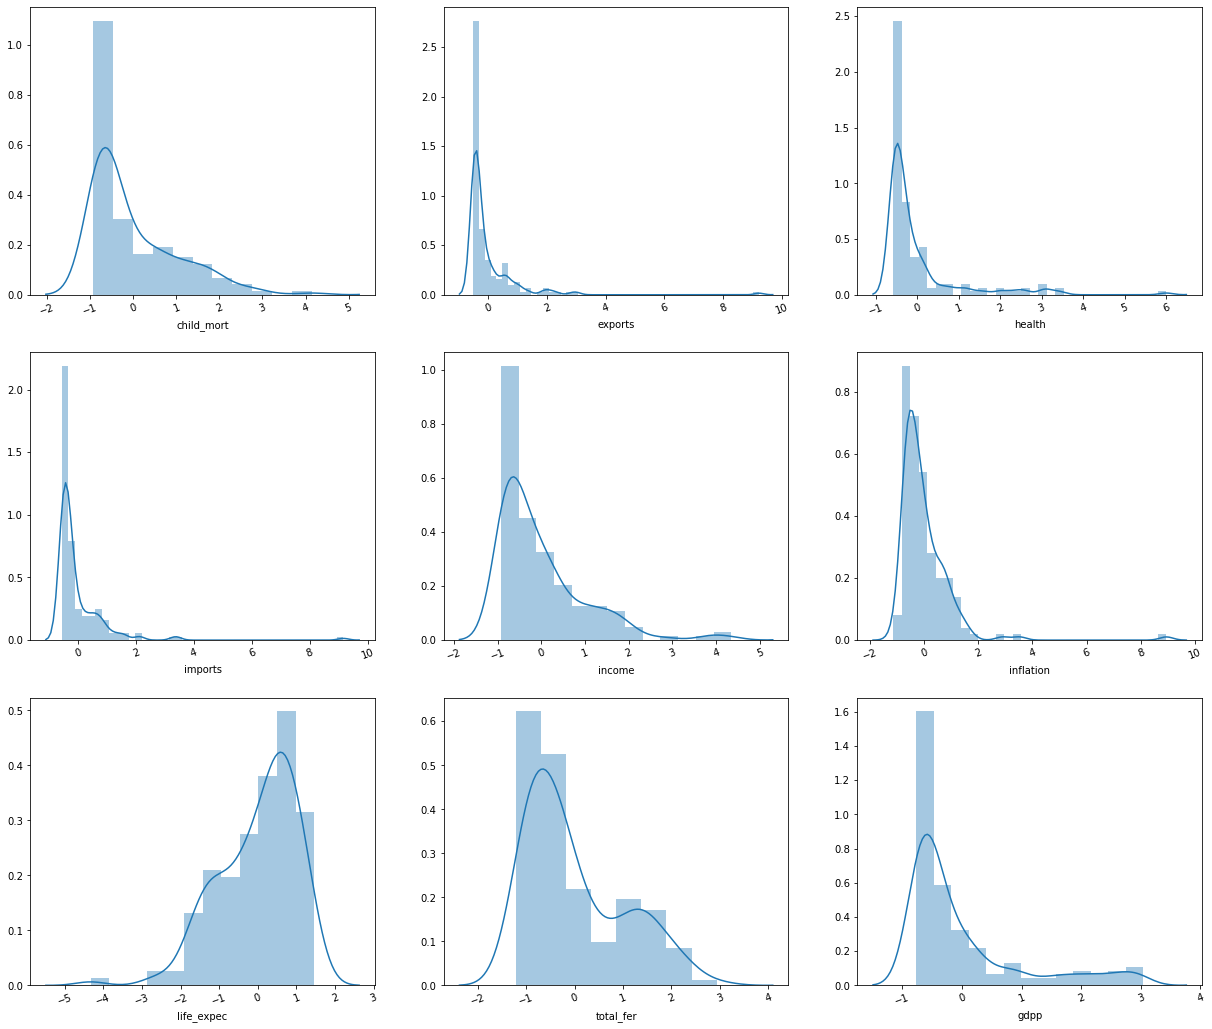

In [130]:
plt.figure(figsize=(21, 18))
features = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(features):
    ax = plt.subplot(3, 3, i[0]+1)
    sns.distplot(df_scaled[i[1]])
    plt.xticks(rotation=20)

#### We can see here that after scaling the data, The variables seem to have better form of Normal Distribution or close to Normal form.


## Data Modelling

### Finding the Optimal Number of Clusters
### SSD (Elbow Curve)

In [131]:
#Checking the dataframe
df_scaled.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.234847 -0.510090 -0.563608 -0.530152 -0.856955   0.124994   -1.572901   
1   -0.582710 -0.396063 -0.391462 -0.321693 -0.308713  -0.336520    0.723646   
2   -0.318473 -0.336697 -0.453862 -0.392076 -0.113006   0.745941    0.746497   
3    1.946065 -0.285794 -0.518900 -0.378423 -0.574267   1.333323   -1.127302   
4   -0.738289  0.064875 -0.035126  0.301255  0.295540  -0.620888    0.780774   

   total_fer      gdpp  
0   1.838989 -0.738376  
1  -0.889676 -0.459367  
2  -0.078274 -0.430180  
3   2.061470 -0.503541  
4  -0.575585  0.180376

In [132]:
df_scaled.shape

(158, 9)

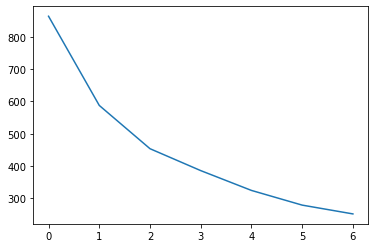

In [133]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [134]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.4769303319503149
For n_clusters=3, the silhouette score is 0.4140131515080364
For n_clusters=4, the silhouette score is 0.42140707751200024
For n_clusters=5, the silhouette score is 0.4269917078918057
For n_clusters=6, the silhouette score is 0.34316289803444444
For n_clusters=7, the silhouette score is 0.29425203624707524
For n_clusters=8, the silhouette score is 0.30563265357784536


#### INSIGHT: From the above validations(Elbow Curve & silhouette analysis), we could see that numbers of clusters 3 and 4 are optimal number of clusters to be used. We will try 2 different iterations in K-Means clustering using 3, and 4 Clusters and analyse the results.

### K-Means Clustering
#### First Iteration - Using 3 Clusters

In [135]:
# K Means with with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [136]:
kmeans.labels_

array([2, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 2, 1,
       0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0, 1,
       1, 1, 1, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1, 2, 1,
       0, 1, 1, 1, 2, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2, 2, 1, 1,
       1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 2, 2, 1,
       2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 1, 1, 2, 0, 1, 0, 2, 2, 0,
       0, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 2, 2])

In [145]:
# assign the label

df_scaled['cluster_id_3'] = kmeans.labels_
df_scaled.head()

child_mort  exports    health   imports  income  \
country                                                                
Afghanistan                90.2    55.30   41.9174   248.297    1610   
Albania                    16.6  1145.20  267.8950  1987.740    9930   
Algeria                    27.3  1712.64  185.9820  1400.440   12900   
Angola                    119.0  2199.19  100.6050  1514.370    5900   
Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

                     inflation  life_expec  total_fer   gdpp  cluster_id_3  
country                                                                     
Afghanistan               9.44        56.2       5.82    553             2  
Albania                   4.49        76.3       1.65   4090             1  
Algeria                  16.10        76.5       2.89   4460             1  
Angola                   22.40        60.1       6.16   3530             2  
Antigua and Barbuda       1.44        76.8       2.13  12200             1

In [147]:
# Create a new datafame with cluster labels to it.

df_merge_km = df_scaled.copy()

df_merge_km.head()

child_mort  exports    health   imports  income  \
country                                                                
Afghanistan                90.2    55.30   41.9174   248.297    1610   
Albania                    16.6  1145.20  267.8950  1987.740    9930   
Algeria                    27.3  1712.64  185.9820  1400.440   12900   
Angola                    119.0  2199.19  100.6050  1514.370    5900   
Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

                     inflation  life_expec  total_fer   gdpp  cluster_id_3  
country                                                                     
Afghanistan               9.44        56.2       5.82    553             2  
Albania                   4.49        76.3       1.65   4090             1  
Algeria                  16.10        76.5       2.89   4460             1  
Angola                   22.40        60.1       6.16   3530             2  
Antigua and Barbuda       1.44        76.8       2.13  12200             1

In [157]:
df_merge_km.reset_index(level=['country'], inplace=True)


df_merge_km.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  cluster_id_3  
0       9.44        56.2       5.82    553             2  
1       4.49        76.3       1.65   4090             1  
2      16.10        76.5       2.89   4460             1  
3      22.40        60.1       6.16   3530             2  
4       1.44        76.8       2.13  12200             1

In [158]:
df_merge_km.shape

(158, 11)

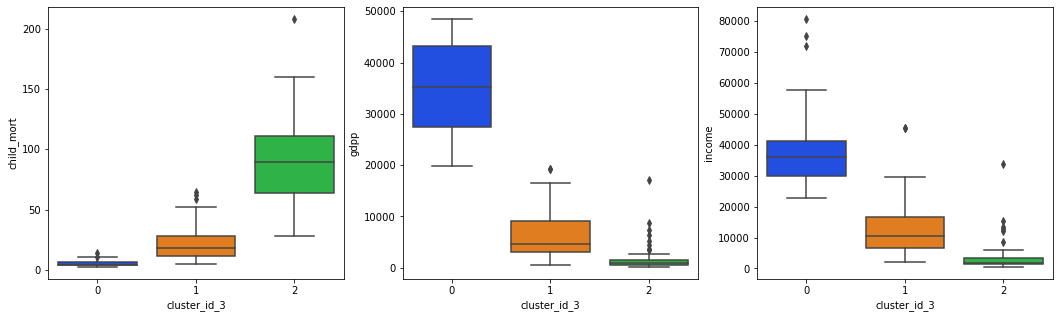

In [159]:
# Box plot on various variable against the CLUSTER_ID to visualize the spread of the data

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_id_3', y='child_mort', data=df_merge_km, palette="bright")
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_id_3', y='gdpp', data=df_merge_km, palette="bright")
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_id_3', y='income', data=df_merge_km, palette="bright")

plt.show()

#### Insight: We can see that cluster 2 has the highest child mortality while it also has low gdpp and Income. We'll see which are those countries that lie in this cluster.


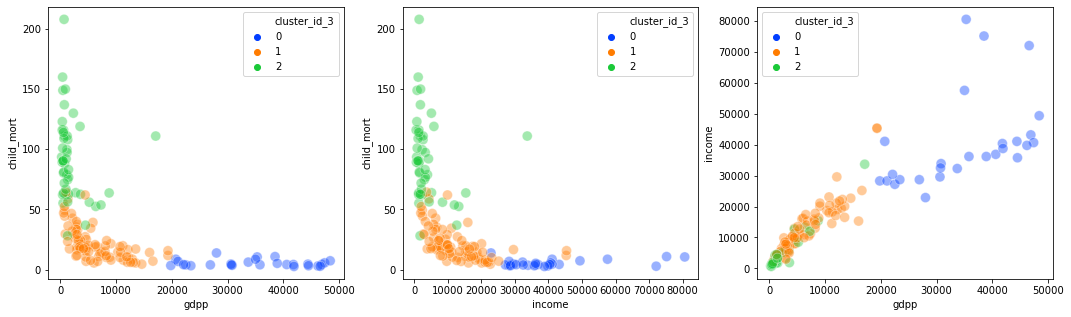

In [307]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_id_3',
                data=df_merge_km, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_id_3',
                data=df_merge_km, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_id_3',
                data=df_merge_km, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.show()

In [161]:
# Checking the countries in Cluster 2 to see which are the countries in that segment.

df_merge_km[['country','child_mort','income','gdpp']][df_merge_km['cluster_id_3'] == 2].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

country  child_mort  income   gdpp
64                      Haiti       208.0    1500    662
125              Sierra Leone       160.0    1220    399
31                       Chad       150.0    1930    897
30   Central African Republic       149.0     888    446
93                       Mali       137.0    1870    708
108                   Nigeria       130.0    5150   2330
107                     Niger       123.0     814    348
3                      Angola       119.0    5900   3530
36           Congo, Dem. Rep.       116.0     609    334
24               Burkina Faso       116.0    1430    575
62              Guinea-Bissau       114.0    1390    547
16                      Benin       111.0    1820    758
39              Cote d'Ivoire       111.0    2690   1220
47          Equatorial Guinea       111.0   33700  17100
61                     Guinea       109.0    1190    648
27                   Cameroon       108.0    2660   1310
102                Mozambique       101.0     918    419
84                    Lesotho        99.7    2380   1170
95                 Mauritania        97.4    3320   1200
25                    Burundi        93.6     764    231
110                  Pakistan        92.1    4280   1040
90                     Malawi        90.5    1030    459
141                      Togo        90.3    1210    488
0                 Afghanistan        90.2    1610    553
85                    Liberia        89.3     700    327
35                    Comoros        88.2    1410    769
157                    Zambia        83.1    3280   1460
146                    Uganda        81.0    1540    595
54                     Gambia        80.3    1660    562
81                        Lao        78.9    3980   1140
135                     Sudan        76.7    3370   1480
57                      Ghana        74.7    3060   1310
138                  Tanzania        71.9    2090    702
122                   Senegal        66.8    2180   1000
37                Congo, Rep.        63.9    5190   2740
53                      Gabon        63.7   15400   8750
119                    Rwanda        63.6    1350    563
78                   Kiribati        62.7    1730   1490
140               Timor-Leste        62.6    1850   3600
89                 Madagascar        62.2    1390    413
77                      Kenya        62.2    2480    967
156                     Yemen        56.3    4480   1310
104                   Namibia        56.0    8460   5190
48                    Eritrea        55.2    1420    482
130              South Africa        53.7   12000   7280
20                   Botswana        52.5   13300   6350
70                       Iraq        36.9   12700   4500
129           Solomon Islands        28.1    1780   1290

### Second Iteration - Using 4 Clusters

In [191]:
kmeans_4 = KMeans(n_clusters=4, max_iter=500, init='k-means++', n_init=10, random_state= 335)
kmeans_4.fit(df_scaled)

KMeans(max_iter=500, n_clusters=4, random_state=335)

In [192]:
kmeans_4.labels_

array([3, 3, 3, 3, 1, 1, 3, 0, 1, 1, 0, 3, 1, 1, 0, 3, 3, 3, 3, 3, 3, 1,
       0, 1, 3, 3, 3, 3, 0, 3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 1, 0, 1, 3,
       3, 3, 3, 1, 3, 1, 3, 0, 0, 1, 3, 3, 0, 3, 1, 3, 3, 3, 3, 3, 3, 1,
       0, 3, 3, 1, 3, 0, 0, 3, 0, 3, 1, 3, 3, 0, 3, 3, 1, 1, 3, 3, 1, 1,
       3, 3, 3, 1, 3, 3, 0, 3, 1, 3, 3, 3, 1, 3, 3, 3, 3, 3, 0, 3, 3, 0,
       3, 1, 3, 3, 3, 1, 1, 1, 1, 3, 3, 0, 3, 3, 1, 3, 2, 1, 0, 3, 3, 1,
       0, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 0, 0, 0, 1, 3, 3,
       1, 3, 3, 3])

In [200]:
# assign the label

df_scaled['cluster_id_4'] = kmeans_4.labels_
df_scaled.head()

child_mort  exports    health   imports  income  \
country                                                                
Afghanistan                90.2    55.30   41.9174   248.297    1610   
Albania                    16.6  1145.20  267.8950  1987.740    9930   
Algeria                    27.3  1712.64  185.9820  1400.440   12900   
Angola                    119.0  2199.19  100.6050  1514.370    5900   
Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

                     inflation  life_expec  total_fer   gdpp  cluster_id_3  \
country                                                                      
Afghanistan               9.44        56.2       5.82    553             2   
Albania                   4.49        76.3       1.65   4090             1   
Algeria                  16.10        76.5       2.89   4460             1   
Angola                   22.40        60.1       6.16   3530             2   
Antigua and Barbuda       1.44        76.8       2.13  12200             1   

                     cluster_id_4  
country                            
Afghanistan                     3  
Albania                         3  
Algeria                         3  
Angola                          3  
Antigua and Barbuda             1

In [201]:
# Create a new datafame with cluster labels to it.

df_merge_km_4 = df_scaled.copy()

df_merge_h_km.reset_index(level=['country'], inplace=True)


df_merge_h_km.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  cluster_id_3  cluster_id_4  
0       9.44        56.2       5.82    553             2             3  
1       4.49        76.3       1.65   4090             1             3  
2      16.10        76.5       2.89   4460             1             3  
3      22.40        60.1       6.16   3530             2             3  
4       1.44        76.8       2.13  12200             1             1

In [202]:
df_merge_km_4.shape

(158, 12)

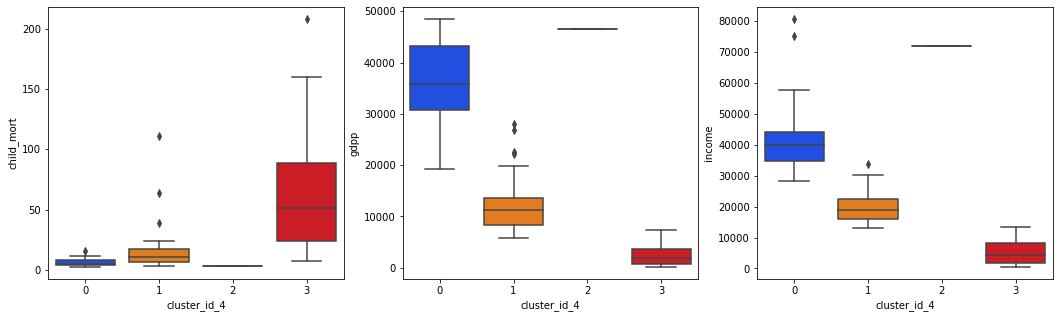

In [203]:
# Box plot on various variable against the CLUSTER_ID to visualize the spread of the data

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_id_4', y='child_mort', data=df_merge_km_4, palette="bright")
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_id_4', y='gdpp', data=df_merge_km_4, palette="bright")
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_id_4', y='income', data=df_merge_km_4, palette="bright")

plt.show()

In [204]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_id_4',
                data=df_merge_km_4, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_id_4',
                data=df_merge_km_4, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_id_4',
                data=df_merge_km_4, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.show()

In [205]:
df_merge_km_4.cluster_id_4.value_counts()

3    96
1    38
0    23
2     1
Name: cluster_id_4, dtype: int64

In [206]:
# Checking the countries in Cluster 3 to see which are the countries in that segment.

df_merge_km_4[['country','child_mort','income','gdpp']][df_merge_km_4['cluster_id_4'] == 3].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

country  child_mort  income  gdpp
64                      Haiti       208.0    1500   662
125              Sierra Leone       160.0    1220   399
31                       Chad       150.0    1930   897
30   Central African Republic       149.0     888   446
93                       Mali       137.0    1870   708
..                        ...         ...     ...   ...
147                   Ukraine        11.7    7820  2970
133                 Sri Lanka        11.2    8560  2810
88             Macedonia, FYR        10.4   11400  4540
123                    Serbia         7.6   12700  5410
19     Bosnia and Herzegovina         6.9    9720  4610

[96 rows x 4 columns]

#### Choosing the model
From the above 2 Iterations of K-Means, we could see that using 3 Clusters provided a better output in terms of a balanced cluster size. So we will consider the 'K-Means with 3 Clusters' as our FINAL MODEL.

### Interpreting the Clusters from K-Means model

#### We have already seen the boxplot at k=3 and decided that cluster 2 seems to be our concern.
    Following are the reasons:
        1. It has highest death mortality.
        2. It has lower income.
        3. It has lower gdpp as well.

In [208]:
#New dataframe for group by & analysis

df_merge_km_analysis =  df_merge_km.groupby(['cluster_id_3']).mean().sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])
df_merge_km_analysis

child_mort       exports       health       imports  \
cluster_id_3                                                        
2              91.610417    879.063521   114.821765    827.028771   
1              21.771084   2908.157813   405.906631   3021.140013   
0               5.433333  18352.233333  3122.890741  16582.611111   

                    income  inflation  life_expec  total_fer          gdpp  
cluster_id_3                                                                
2              3897.354167  11.911146   59.239583   4.992083   1909.208333  
1             12460.120482   7.621012   72.968675   2.279036   6411.710843  
0             40292.592593   2.793370   79.807407   1.731111  34907.407407

In [209]:
# Creating a new field for count of observations in each cluster

df_merge_km_analysis['Observations']=df_merge_km[['cluster_id_3','child_mort']].groupby(['cluster_id_3']).count()
df_merge_km_analysis

child_mort       exports       health       imports  \
cluster_id_3                                                        
2              91.610417    879.063521   114.821765    827.028771   
1              21.771084   2908.157813   405.906631   3021.140013   
0               5.433333  18352.233333  3122.890741  16582.611111   

                    income  inflation  life_expec  total_fer          gdpp  \
cluster_id_3                                                                 
2              3897.354167  11.911146   59.239583   4.992083   1909.208333   
1             12460.120482   7.621012   72.968675   2.279036   6411.710843   
0             40292.592593   2.793370   79.807407   1.731111  34907.407407   

              Observations  
cluster_id_3                
2                       48  
1                       83  
0                       27

In [210]:
# Creating a new field for proportion of observations in each cluster

df_merge_km_analysis['Proportion']=round(df_merge_km_analysis['Observations']/df_merge_km_analysis['Observations'].sum(),2)


#Summary View
df_merge_km_analysis[['child_mort','income','gdpp','Observations','Proportion']]

child_mort        income          gdpp  Observations  Proportion
cluster_id_3                                                                  
2              91.610417   3897.354167   1909.208333            48        0.30
1              21.771084  12460.120482   6411.710843            83        0.53
0               5.433333  40292.592593  34907.407407            27        0.17

### Renaming the clusters

In [211]:
df_merge_km_analysis = df_merge_km_analysis.rename({
    2: 'Under_Developed Countries',
    1: 'Developed Countries',
    0: 'Developing Countries'}).reset_index()

In [212]:
df_merge_km_analysis[['cluster_id_3','child_mort','income','gdpp','Observations','Proportion']]

cluster_id_3  child_mort        income          gdpp  \
0  Under_Developed Countries   91.610417   3897.354167   1909.208333   
1        Developed Countries   21.771084  12460.120482   6411.710843   
2       Developing Countries    5.433333  40292.592593  34907.407407   

   Observations  Proportion  
0            48        0.30  
1            83        0.53  
2            27        0.17

#### Note: The Cluster 2 now becomes 'Under Developed Countries', which will be of our interest. --- We will further analyse the Cluster 'Under Developed Countries' and get to know various metrics of that data set, based on which we could identify our final set of countries which needs the financial support from the NGO

### Analysing the 'Under Developed Countries' Cluster

In [216]:
final_cluster = df_merge_km[df_merge_km['cluster_id_3'] == 2].copy()
final_cluster = final_cluster[['country', 'child_mort', 'income', 'gdpp']]


In [219]:
final_cluster.sort_values([ 'gdpp', 'income','child_mort'], ascending=[True, True, False])


country  child_mort  income   gdpp
25                    Burundi        93.6     764    231
85                    Liberia        89.3     700    327
36           Congo, Dem. Rep.       116.0     609    334
107                     Niger       123.0     814    348
125              Sierra Leone       160.0    1220    399
89                 Madagascar        62.2    1390    413
102                Mozambique       101.0     918    419
30   Central African Republic       149.0     888    446
90                     Malawi        90.5    1030    459
48                    Eritrea        55.2    1420    482
141                      Togo        90.3    1210    488
62              Guinea-Bissau       114.0    1390    547
0                 Afghanistan        90.2    1610    553
54                     Gambia        80.3    1660    562
119                    Rwanda        63.6    1350    563
24               Burkina Faso       116.0    1430    575
146                    Uganda        81.0    1540    595
61                     Guinea       109.0    1190    648
64                      Haiti       208.0    1500    662
138                  Tanzania        71.9    2090    702
93                       Mali       137.0    1870    708
16                      Benin       111.0    1820    758
35                    Comoros        88.2    1410    769
31                       Chad       150.0    1930    897
77                      Kenya        62.2    2480    967
122                   Senegal        66.8    2180   1000
110                  Pakistan        92.1    4280   1040
81                        Lao        78.9    3980   1140
84                    Lesotho        99.7    2380   1170
95                 Mauritania        97.4    3320   1200
39              Cote d'Ivoire       111.0    2690   1220
129           Solomon Islands        28.1    1780   1290
27                   Cameroon       108.0    2660   1310
57                      Ghana        74.7    3060   1310
156                     Yemen        56.3    4480   1310
157                    Zambia        83.1    3280   1460
135                     Sudan        76.7    3370   1480
78                   Kiribati        62.7    1730   1490
108                   Nigeria       130.0    5150   2330
37                Congo, Rep.        63.9    5190   2740
3                      Angola       119.0    5900   3530
140               Timor-Leste        62.6    1850   3600
70                       Iraq        36.9   12700   4500
104                   Namibia        56.0    8460   5190
20                   Botswana        52.5   13300   6350
130              South Africa        53.7   12000   7280
53                      Gabon        63.7   15400   8750
47          Equatorial Guinea       111.0   33700  17100

### Decision Making on the final approach

In [221]:
final_cluster.describe()


child_mort        income          gdpp
count   48.000000     48.000000     48.000000
mean    91.610417   3897.354167   1909.208333
std     34.319855   5590.168621   2925.911009
min     28.100000    609.000000    231.000000
25%     63.675000   1390.000000    551.500000
50%     89.750000   1860.000000    932.000000
75%    111.000000   3522.500000   1465.000000
max    208.000000  33700.000000  17100.000000

#### NOTE: Looking at the descriptive statistics of our Under Developed Countries cluster, we could notice that some of the countries have really high income and gdpp values (looking at the max values of income & gdpp). From a business problem prespective, we would want our numbers of child mortality, income and gdpp somewhere around the MEDIAN level (We decided to go with MEDIAN and not MEAN, as there seems to be a greater variablity in the income and gdpp values). So the approach we are going to take is to filter out all countries from our original list with income & gdpp less than the Median of 1860 & 932 respectively and Child Mortality >= the Median of 90. --- We will perform the filtering in the order GDPP --> INCOME --> CHILD MORTALITY --- This is due to reason that, we need to identify the countries with lowest GDPP & INCOME first and then with maximum CHILD MORTALITY. This is based on the understanding that, countries with highest child mortality and having higher gdpp & income will not have any impact on the child mortality rate even after the financial aid.

### Fetching the final data based on Cluster Median
Data less than median of gdpp of the cluster

#### NOTE: We could see that the Median values of gdpp for 'Under Developed Countries' is ~932. We will take this as a benchmark and fetch all countries from our 'ORIGINAL dataframe with gdpp <= 932.

In [228]:
df_new.reset_index(inplace =True)

Under_Developed_Countries = df_new[df_new['gdpp'] <= 932].copy()

Under_Developed_Countries=Under_Developed_Countries.sort_values([ 'gdpp', 'income','child_mort'], ascending=[True, True, False])

In [229]:
Under_Developed_Countries[['country', 'child_mort', 'gdpp', 'income']]

country  child_mort  gdpp  income
25                    Burundi        93.6   231     764
85                    Liberia        89.3   327     700
36           Congo, Dem. Rep.       116.0   334     609
107                     Niger       123.0   348     814
125              Sierra Leone       160.0   399    1220
89                 Madagascar        62.2   413    1390
102                Mozambique       101.0   419     918
30   Central African Republic       149.0   446     888
90                     Malawi        90.5   459    1030
48                    Eritrea        55.2   482    1420
141                      Togo        90.3   488    1210
62              Guinea-Bissau       114.0   547    1390
0                 Afghanistan        90.2   553    1610
54                     Gambia        80.3   562    1660
119                    Rwanda        63.6   563    1350
24               Burkina Faso       116.0   575    1430
105                     Nepal        47.0   592    1990
146                    Uganda        81.0   595    1540
61                     Guinea       109.0   648    1190
64                      Haiti       208.0   662    1500
138                  Tanzania        71.9   702    2090
93                       Mali       137.0   708    1870
137                Tajikistan        52.4   738    2110
16                      Benin       111.0   758    1820
11                 Bangladesh        49.4   758    2440
35                    Comoros        88.2   769    1410
26                   Cambodia        44.4   786    2520
80            Kyrgyz Republic        29.6   880    2790
31                       Chad       150.0   897    1930

In [230]:
Under_Developed_Countries.shape

(29, 11)

#### Data less than median of income of the cluster
     
NOTE: We could see that the Median values of income for 'Under Developed Countries' is ~932. We will take this as a       benchmark and fetch all countries from our 'ORIGINAL dataframe with income <= 1860.

In [231]:
Under_Developed_Countries = Under_Developed_Countries[Under_Developed_Countries['income'] <= 1860]
Under_Developed_Countries=Under_Developed_Countries.sort_values([ 'gdpp', 'income','child_mort'], ascending=[True, True, False])

In [232]:
Under_Developed_Countries[['country', 'child_mort', 'gdpp', 'income']]

country  child_mort  gdpp  income
25                    Burundi        93.6   231     764
85                    Liberia        89.3   327     700
36           Congo, Dem. Rep.       116.0   334     609
107                     Niger       123.0   348     814
125              Sierra Leone       160.0   399    1220
89                 Madagascar        62.2   413    1390
102                Mozambique       101.0   419     918
30   Central African Republic       149.0   446     888
90                     Malawi        90.5   459    1030
48                    Eritrea        55.2   482    1420
141                      Togo        90.3   488    1210
62              Guinea-Bissau       114.0   547    1390
0                 Afghanistan        90.2   553    1610
54                     Gambia        80.3   562    1660
119                    Rwanda        63.6   563    1350
24               Burkina Faso       116.0   575    1430
146                    Uganda        81.0   595    1540
61                     Guinea       109.0   648    1190
64                      Haiti       208.0   662    1500
16                      Benin       111.0   758    1820
35                    Comoros        88.2   769    1410

In [233]:
Under_Developed_Countries.shape

(21, 11)

#### Data greater than median of child mortality rate of the final cluster

     NOTE: We could see that the Median values of Child Mortality for 'Under Developed Countries' is ~90. We will take this as a benchmark and fetch all countries from our 'ORIGINAL dataframe with Child Mortality >= 90.

In [234]:
# We create a new dataframe to store the countries satisfying the cluster median from original dataframe

Under_Developed_Countries = Under_Developed_Countries[Under_Developed_Countries['child_mort'] >= 90]
Under_Developed_Countries=Under_Developed_Countries.sort_values([ 'gdpp', 'income','child_mort'], ascending=[True, True, False])

In [235]:
Under_Developed_Countries[['country', 'child_mort', 'gdpp', 'income']]


country  child_mort  gdpp  income
25                    Burundi        93.6   231     764
36           Congo, Dem. Rep.       116.0   334     609
107                     Niger       123.0   348     814
125              Sierra Leone       160.0   399    1220
102                Mozambique       101.0   419     918
30   Central African Republic       149.0   446     888
90                     Malawi        90.5   459    1030
141                      Togo        90.3   488    1210
62              Guinea-Bissau       114.0   547    1390
0                 Afghanistan        90.2   553    1610
24               Burkina Faso       116.0   575    1430
61                     Guinea       109.0   648    1190
64                      Haiti       208.0   662    1500
16                      Benin       111.0   758    1820

In [236]:
Under_Developed_Countries.shape


(14, 11)

In [308]:
# Saving the top 5 underdeveloped list to a new dataframe

UDC_top_10=Under_Developed_Countries[['country', 'gdpp', 'income', 'child_mort']].head(10).copy()

### FINAL COUNTRIES LIST

In [309]:
UDC_top_10

country  gdpp  income  child_mort
25                    Burundi   231     764        93.6
85                    Liberia   327     700        89.3
36           Congo, Dem. Rep.   334     609       116.0
107                     Niger   348     814       123.0
125              Sierra Leone   399    1220       160.0
89                 Madagascar   413    1390        62.2
102                Mozambique   419     918       101.0
30   Central African Republic   446     888       149.0
90                     Malawi   459    1030        90.5
48                    Eritrea   482    1420        55.2

### Hierarchical Clustering
    As mentioned in the 'Approach' section, we will use Hierarchical Clustering to identify appropriate cluster size with a good split of data (Max Intra-Cluster distance & Min Inter-Cluster Distance)

In [239]:
df_scaled.head()


child_mort  exports    health   imports  income  \
country                                                                
Afghanistan                90.2    55.30   41.9174   248.297    1610   
Albania                    16.6  1145.20  267.8950  1987.740    9930   
Algeria                    27.3  1712.64  185.9820  1400.440   12900   
Angola                    119.0  2199.19  100.6050  1514.370    5900   
Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

                     inflation  life_expec  total_fer   gdpp  cluster_id_3  \
country                                                                      
Afghanistan               9.44        56.2       5.82    553             2   
Albania                   4.49        76.3       1.65   4090             1   
Algeria                  16.10        76.5       2.89   4460             1   
Angola                   22.40        60.1       6.16   3530             2   
Antigua and Barbuda       1.44        76.8       2.13  12200             1   

                     cluster_id_4  
country                            
Afghanistan                     3  
Albania                         3  
Algeria                         3  
Angola                          3  
Antigua and Barbuda             1

In [240]:
# single linkage: : Here, the distance between 2 clusters is defined as the shortest distance between points in the two clusters.

plt.figure(figsize=(18, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
mergings_s = linkage(df_scaled, method="single", metric='euclidean')
dendrogram(mergings_s)
plt.show()

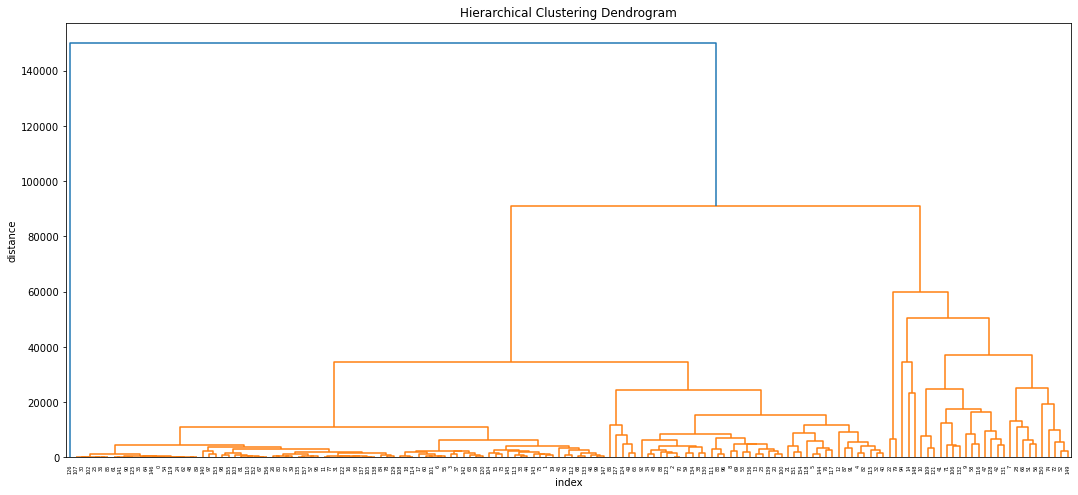

In [241]:
# complete linkage : Here, the distance between 2 clusters is defined as the maximum distance between any 2 points in the clusters.

plt.figure(figsize=(18, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
mergings_c = linkage(df_scaled, method="complete", metric='euclidean')
dendrogram(mergings_c)
plt.show()


#### NOTE: From the above Dendrograms, it is evident that 'Complete Linkage' gives a better cluster formation. So we will use Complete linkage output for our further analysis. We will build two iterations of clustering with 3 & 4 clusters (based on inputs from the above Dendrogram with Complete Linkage) and analyse the output.

#### First Iteration - Using 3 Clusters

In [242]:
# 3 clusters
cluster_labels_3 = cut_tree(mergings_c, n_clusters=3).reshape(-1, )
cluster_labels_3

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0])

In [272]:
# Create a new datafame with cluster labels to it.
df_merge_h = df_new.copy()
df_merge_h['cluster_labels_3'] = cluster_labels_3

df_merge_h.head()


country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  cluster_labels_3  
0       9.44        56.2       5.82    553                 0  
1       4.49        76.3       1.65   4090                 0  
2      16.10        76.5       2.89   4460                 0  
3      22.40        60.1       6.16   3530                 0  
4       1.44        76.8       2.13  12200                 0

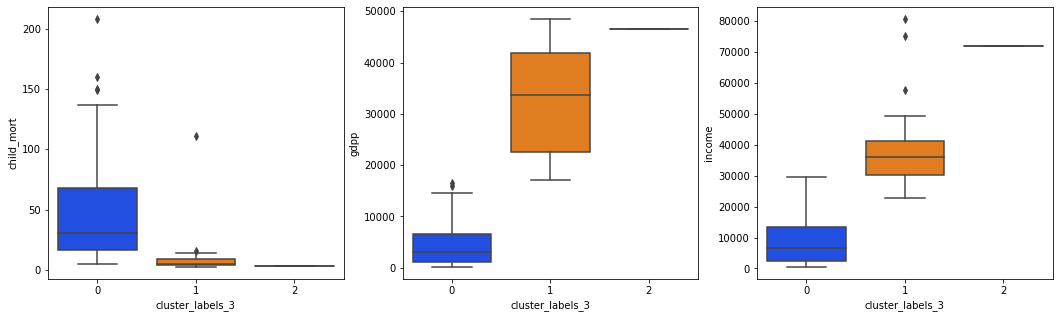

In [273]:
# Box plot on various variable against the CLUSTER_ID to visualize the spread of the data

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_labels_3', y='child_mort', data=df_merge_h, palette="bright")
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_labels_3', y='gdpp', data=df_merge_h, palette="bright")
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_labels_3', y='income', data=df_merge_h, palette="bright")

plt.show()

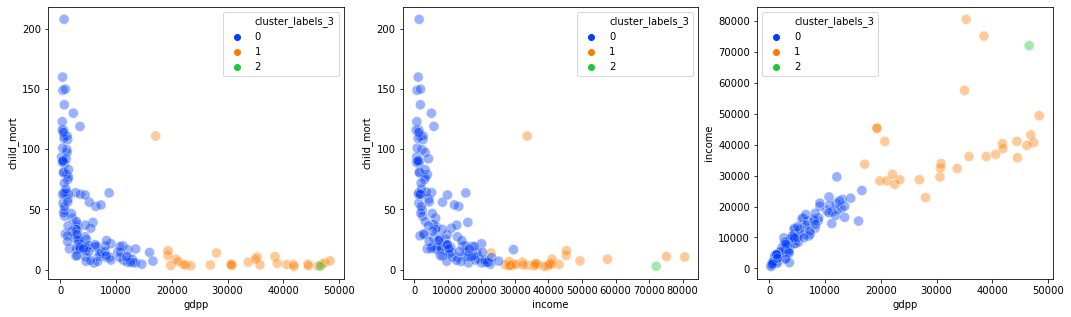

In [274]:

# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_labels_3',
                data=df_merge_h, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_labels_3',
                data=df_merge_h, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_labels_3',
                data=df_merge_h, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.show()

In [275]:
# Checking cluster count

df_merge_h.cluster_labels_3.value_counts()

0    128
1     29
2      1
Name: cluster_labels_3, dtype: int64

#### Note: Most of the countries seem to clustered in cluster 0. We will analyze thi cluster further more.

In [277]:
# Checking the countries in Cluster 0 to see which are the countries in that segment.

df_merge_h[df_merge_h['cluster_labels_3'] == 0]

country  child_mort  exports    health   imports  income  \
0            Afghanistan        90.2    55.30   41.9174   248.297    1610   
1                Albania        16.6  1145.20  267.8950  1987.740    9930   
2                Algeria        27.3  1712.64  185.9820  1400.440   12900   
3                 Angola       119.0  2199.19  100.6050  1514.370    5900   
4    Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   
..                   ...         ...      ...       ...       ...     ...   
153              Vanuatu        29.2  1384.02  155.9250  1565.190    2950   
154            Venezuela        17.1  3847.50  662.8500  2376.000   16500   
155              Vietnam        23.3   943.20   89.6040  1050.620    4490   
156                Yemen        56.3   393.00   67.8580   450.640    4480   
157               Zambia        83.1   540.20   85.9940   451.140    3280   

     inflation  life_expec  total_fer   gdpp  cluster_labels_3  
0         9.44        56.2       5.82    553                 0  
1         4.49        76.3       1.65   4090                 0  
2        16.10        76.5       2.89   4460                 0  
3        22.40        60.1       6.16   3530                 0  
4         1.44        76.8       2.13  12200                 0  
..         ...         ...        ...    ...               ...  
153       2.62        63.0       3.50   2970                 0  
154      45.90        75.4       2.47  13500                 0  
155      12.10        73.1       1.95   1310                 0  
156      23.60        67.5       4.67   1310                 0  
157      14.00        52.0       5.40   1460                 0  

[128 rows x 11 columns]

### Second Iteration - Using 4 Clusters

In [270]:
# 4 clusters
cluster_labels_4 = cut_tree(mergings_c, n_clusters=4).reshape(-1, )
cluster_labels_4

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0])

In [278]:
df_merge_h['cluster_labels_4'] = cluster_labels_4

df_merge_h.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  cluster_labels_3  cluster_labels_4  
0       9.44        56.2       5.82    553                 0                 0  
1       4.49        76.3       1.65   4090                 0                 0  
2      16.10        76.5       2.89   4460                 0                 0  
3      22.40        60.1       6.16   3530                 0                 0  
4       1.44        76.8       2.13  12200                 0                 0

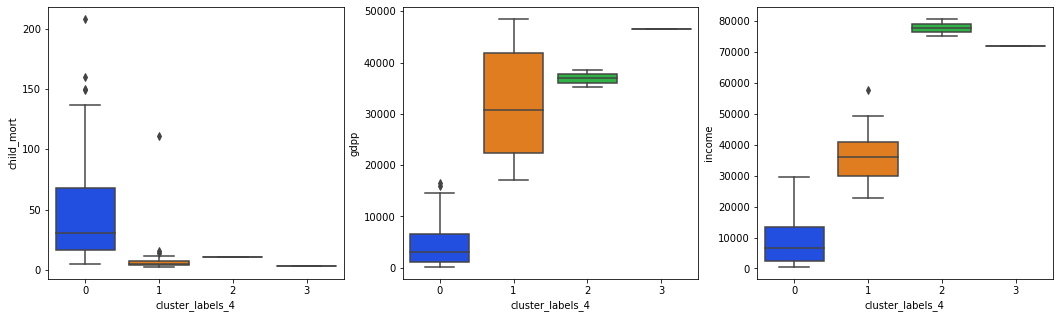

In [279]:
# Box plot on various variable against the CLUSTER_ID to visualize the spread of the data

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_labels_4', y='child_mort', data=df_merge_h, palette="bright")
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_labels_4', y='gdpp', data=df_merge_h, palette="bright")
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_labels_4', y='income', data=df_merge_h, palette="bright")

plt.show()

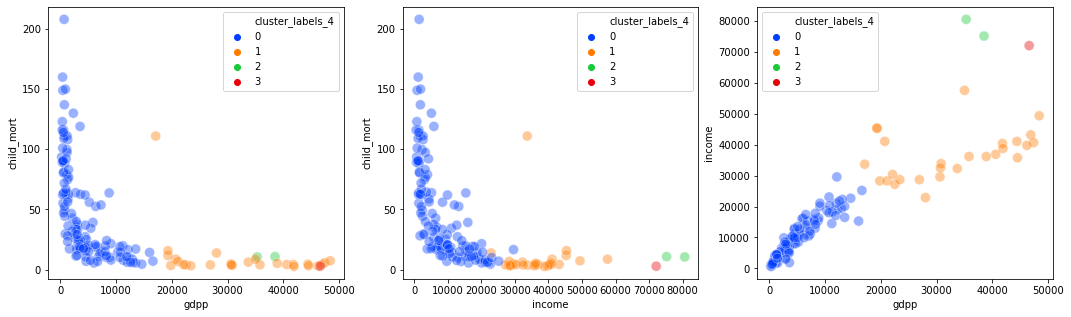

In [280]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_labels_4',
                data=df_merge_h, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_labels_4',
                data=df_merge_h, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_labels_4',
                data=df_merge_h, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.show()

In [281]:
df_merge_h.cluster_labels_4.value_counts()

0    128
1     27
2      2
3      1
Name: cluster_labels_4, dtype: int64

In [282]:
# Checking the countries in Cluster 3 to see which are the countries in that segment.

df_merge_h[df_merge_h['cluster_labels_4'] == 3]

country  child_mort  exports   health  imports  income  inflation  \
126  Singapore         2.8  93200.0  1845.36  81084.0   72100     -0.046   

     life_expec  total_fer   gdpp  cluster_labels_3  cluster_labels_4  
126        82.7       1.15  46600                 2                 3

In [283]:
# Checking the countries in Cluster 2 to see which are the countries in that segment.

df_merge_h[df_merge_h['cluster_labels_4'] == 2]

country  child_mort  exports   health  imports  income  inflation  \
22  Brunei        10.5  23792.2  1002.52   9884.0   80600       16.7   
79  Kuwait        10.8  25679.5  1012.55  11704.0   75200       11.2   

    life_expec  total_fer   gdpp  cluster_labels_3  cluster_labels_4  
22        77.1       1.84  35300                 1                 2  
79        78.2       2.21  38500                 1                 2

#### Note: If we look at clusters 2 and 3,These clusters have number of countries 2 & 1 respectively. And if we look at Child mortality, Income and gdpp of these countries, It is not in our interest and certainly not the business requirement.Therefore we will go ahead with using 3 clusters only.

### Interpreting the Clusters from Hierarchical model

In [284]:
#New dataframe for group by & analysis
df_merge_h_analysis =  df_merge_h.groupby(['cluster_labels_3']).mean()
df_merge_h_analysis

child_mort       exports       health       imports  \
cluster_labels_3                                                        
0                  47.389844   1926.933184   289.633087   2078.589860   
1                   9.734483  15146.034483  2917.287931  13484.103448   
2                   2.800000  93200.000000  1845.360000  81084.000000   

                        income  inflation  life_expec  total_fer  \
cluster_labels_3                                                   
0                  8569.242188   8.957648   67.873437   3.263359   
1                 39317.241379   4.591966   78.765517   1.953793   
2                 72100.000000  -0.046000   82.700000   1.150000   

                          gdpp  cluster_labels_4  
cluster_labels_3                                  
0                  4438.390625          0.000000  
1                 32813.793103          1.068966  
2                 46600.000000          3.000000

In [285]:
# Creating a new field for count of observations in each cluster
df_merge_h_analysis['Observations']=df_merge_h[['cluster_labels_3','child_mort']].groupby(['cluster_labels_3']).count()
df_merge_h_analysis

child_mort       exports       health       imports  \
cluster_labels_3                                                        
0                  47.389844   1926.933184   289.633087   2078.589860   
1                   9.734483  15146.034483  2917.287931  13484.103448   
2                   2.800000  93200.000000  1845.360000  81084.000000   

                        income  inflation  life_expec  total_fer  \
cluster_labels_3                                                   
0                  8569.242188   8.957648   67.873437   3.263359   
1                 39317.241379   4.591966   78.765517   1.953793   
2                 72100.000000  -0.046000   82.700000   1.150000   

                          gdpp  cluster_labels_4  Observations  
cluster_labels_3                                                
0                  4438.390625          0.000000           128  
1                 32813.793103          1.068966            29  
2                 46600.000000          3.000000             1

In [286]:
# Creating a new field for proportion of observations in each cluster
df_merge_h_analysis['Proportion']=round(df_merge_h_analysis['Observations']/df_merge_h_analysis['Observations'].sum(),2)
df_merge_h_analysis

child_mort       exports       health       imports  \
cluster_labels_3                                                        
0                  47.389844   1926.933184   289.633087   2078.589860   
1                   9.734483  15146.034483  2917.287931  13484.103448   
2                   2.800000  93200.000000  1845.360000  81084.000000   

                        income  inflation  life_expec  total_fer  \
cluster_labels_3                                                   
0                  8569.242188   8.957648   67.873437   3.263359   
1                 39317.241379   4.591966   78.765517   1.953793   
2                 72100.000000  -0.046000   82.700000   1.150000   

                          gdpp  cluster_labels_4  Observations  Proportion  
cluster_labels_3                                                            
0                  4438.390625          0.000000           128        0.81  
1                 32813.793103          1.068966            29        0.18  
2                 46600.000000          3.000000             1        0.01

In [287]:
#Summary View
df_merge_h_analysis[['child_mort','income','gdpp','Observations','Proportion']]

child_mort        income          gdpp  Observations  \
cluster_labels_3                                                         
0                  47.389844   8569.242188   4438.390625           128   
1                   9.734483  39317.241379  32813.793103            29   
2                   2.800000  72100.000000  46600.000000             1   

                  Proportion  
cluster_labels_3              
0                       0.81  
1                       0.18  
2                       0.01

### Renaming the Clusters

In [288]:
df_merge_h_analysis = df_merge_h_analysis.rename({
    0: 'Under_Developed Countries',
    1: 'Developing Countries',
    2: 'Developed Countries'}).reset_index()

In [290]:
df_merge_h_analysis[['cluster_labels_3','child_mort','income','gdpp','Observations','Proportion']]

cluster_labels_3  child_mort        income          gdpp  \
0  Under_Developed Countries   47.389844   8569.242188   4438.390625   
1       Developing Countries    9.734483  39317.241379  32813.793103   
2        Developed Countries    2.800000  72100.000000  46600.000000   

   Observations  Proportion  
0           128        0.81  
1            29        0.18  
2             1        0.01

#### Final Cluster: Based on the above interpretation of the cluster, we now rename all the clusters accordingly. The Cluster 0 now becomes 'Under Developed Countries', which will be of our interest. --- We will further analyse the Cluster 'Under Developed Countries' and get to know various metrics of that data set, based on which we could identify our final set of countries which needs the financial support from the NGO

### Analysing the 'Under Developed Countries' Cluster

In [292]:
# Countries in Cluster_labels_3 = 0, save to a new dataframe, this will form our final cluster data

final_cluster = df_merge_h[df_merge_h['cluster_labels_3'] == 0].copy()
final_cluster = final_cluster[['country', 'child_mort', 'income', 'gdpp']]

In [293]:
final_cluster.sort_values([ 'gdpp', 'income','child_mort'], ascending=[True, True, False])

country  child_mort  income   gdpp
25            Burundi        93.6     764    231
85            Liberia        89.3     700    327
36   Congo, Dem. Rep.       116.0     609    334
107             Niger       123.0     814    348
125      Sierra Leone       160.0    1220    399
..                ...         ...     ...    ...
154         Venezuela        17.1   16500  13500
40            Croatia         5.5   20100  13500
49            Estonia         4.5   22700  14600
12           Barbados        14.2   15300  16000
127   Slovak Republic         7.0   25200  16600

[128 rows x 4 columns]

#### Decision Making on the final approach

In [294]:
final_cluster.describe()

child_mort        income          gdpp
count  128.000000    128.000000    128.000000
mean    47.389844   8569.242188   4438.390625
std     40.972276   6833.699409   4100.482425
min      4.500000    609.000000    231.000000
25%     16.575000   2470.000000   1030.000000
50%     30.750000   6720.000000   3075.000000
75%     68.075000  13350.000000   6567.500000
max    208.000000  29600.000000  16600.000000

#### NOTE: Looking at the descriptive statistics of our Under Developed Countries cluster, we could notice that some of the countries have really high income and gdpp values (looking at the max values of income & gdpp). From a business problem prespective, we would want our numbers of child mortality, income and gdpp somewhere around the MEDIAN level (We decided to go with MEDIAN and not MEAN, as there seems to be a greater variablity in the income and gdpp values). So the approach we are going to take is to filter out all countries from our original list with income & gdpp less than the Median of 6720 & 3075 respectively and Child Mortality >= the Median of 30. --- We will perform the filtering in the order GDPP --> INCOME --> CHILD MORTALITY --- This is due to reason that, we need to identify the countries with lowest GDPP & INCOME first and then with maximum CHILD MORTALITY. This is based on the understanding that, countries with highest child mortality and having higher gdpp & income will not have any impact on the child mortality rate even after the financial aid.

### Fetching the final data based on Cluster Median

#### Data less than median of gdpp of the cluster

#### NOTE: We could see that the Median values of gdpp for 'Under Developed Countries' is 3075. We will take this as a benchmark and fetch all countries from our 'ORIGINAL dataframe with gdpp <= 3075.

In [295]:
Under_Developed_Countries = df_new[df_new['gdpp'] <= 3075].copy()

Under_Developed_Countries=Under_Developed_Countries.sort_values([ 'gdpp', 'income','child_mort'], ascending=[True, True, False])

In [296]:
Under_Developed_Countries[['country', 'child_mort', 'gdpp', 'income']]

country  child_mort  gdpp  income
25            Burundi        93.6   231     764
85            Liberia        89.3   327     700
36   Congo, Dem. Rep.       116.0   334     609
107             Niger       123.0   348     814
125      Sierra Leone       160.0   399    1220
..                ...         ...   ...     ...
55            Georgia        16.5  2960    6730
153           Vanuatu        29.2  2970    2950
147           Ukraine        11.7  2970    7820
46        El Salvador        19.2  2990    7300
63             Guyana        37.6  3040    5840

[64 rows x 4 columns]

In [297]:
Under_Developed_Countries.shape

(64, 10)

#### Data less than median of income of the cluster

#### NOTE: We could see that the Median values of income for 'Under Developed Countries' is 6720. We will take this as a benchmark and fetch all countries from our 'ORIGINAL dataframe with income <= 6720.

In [298]:
Under_Developed_Countries = Under_Developed_Countries[Under_Developed_Countries['income'] <= 6720]
Under_Developed_Countries=Under_Developed_Countries.sort_values([ 'gdpp', 'income','child_mort'], ascending=[True, True, False])

In [299]:
Under_Developed_Countries[['country', 'child_mort', 'gdpp', 'income']]

country  child_mort  gdpp  income
25                    Burundi        93.6   231     764
85                    Liberia        89.3   327     700
36           Congo, Dem. Rep.       116.0   334     609
107                     Niger       123.0   348     814
125              Sierra Leone       160.0   399    1220
89                 Madagascar        62.2   413    1390
102                Mozambique       101.0   419     918
30   Central African Republic       149.0   446     888
90                     Malawi        90.5   459    1030
48                    Eritrea        55.2   482    1420
141                      Togo        90.3   488    1210
62              Guinea-Bissau       114.0   547    1390
0                 Afghanistan        90.2   553    1610
54                     Gambia        80.3   562    1660
119                    Rwanda        63.6   563    1350
24               Burkina Faso       116.0   575    1430
105                     Nepal        47.0   592    1990
146                    Uganda        81.0   595    1540
61                     Guinea       109.0   648    1190
64                      Haiti       208.0   662    1500
138                  Tanzania        71.9   702    2090
93                       Mali       137.0   708    1870
137                Tajikistan        52.4   738    2110
16                      Benin       111.0   758    1820
11                 Bangladesh        49.4   758    2440
35                    Comoros        88.2   769    1410
26                   Cambodia        44.4   786    2520
80            Kyrgyz Republic        29.6   880    2790
31                       Chad       150.0   897    1930
77                      Kenya        62.2   967    2480
103                   Myanmar        64.4   988    3720
122                   Senegal        66.8  1000    2180
110                  Pakistan        92.1  1040    4280
81                        Lao        78.9  1140    3980
84                    Lesotho        99.7  1170    2380
95                 Mauritania        97.4  1200    3320
39              Cote d'Ivoire       111.0  1220    2690
129           Solomon Islands        28.1  1290    1780
27                   Cameroon       108.0  1310    2660
57                      Ghana        74.7  1310    3060
156                     Yemen        56.3  1310    4480
155                   Vietnam        23.3  1310    4490
67                      India        58.8  1350    4410
152                Uzbekistan        36.3  1380    4240
157                    Zambia        83.1  1460    3280
135                     Sudan        76.7  1480    3370
78                   Kiribati        62.7  1490    1730
98                    Moldova        17.2  1630    3910
18                    Bolivia        46.6  1980    5410
114               Philippines        31.9  2130    5600
17                     Bhutan        42.7  2180    6420
108                   Nigeria       130.0  2330    5150
37                Congo, Rep.        63.9  2740    5190
101                   Morocco        33.5  2830    6440
60                  Guatemala        35.4  2830    6710
97      Micronesia, Fed. Sts.        40.0  2860    3340
153                   Vanuatu        29.2  2970    2950
63                     Guyana        37.6  3040    5840

In [300]:
Under_Developed_Countries.shape

(58, 10)

### Data greater than median of child mortality rate of the final cluster

#### NOTE: We could see that the Median values of Child Mortality for 'Under Developed Countries' is ~30. We will take this as a benchmark and fetch all countries from our 'ORIGINAL dataframe with Child Mortality >= 30.

In [301]:
Under_Developed_Countries = Under_Developed_Countries[Under_Developed_Countries['child_mort'] >= 30]
Under_Developed_Countries=Under_Developed_Countries.sort_values([ 'gdpp', 'income','child_mort'], ascending=[True, True, False])

In [302]:
Under_Developed_Countries[['country', 'child_mort', 'gdpp', 'income']]

country  child_mort  gdpp  income
25                    Burundi        93.6   231     764
85                    Liberia        89.3   327     700
36           Congo, Dem. Rep.       116.0   334     609
107                     Niger       123.0   348     814
125              Sierra Leone       160.0   399    1220
89                 Madagascar        62.2   413    1390
102                Mozambique       101.0   419     918
30   Central African Republic       149.0   446     888
90                     Malawi        90.5   459    1030
48                    Eritrea        55.2   482    1420
141                      Togo        90.3   488    1210
62              Guinea-Bissau       114.0   547    1390
0                 Afghanistan        90.2   553    1610
54                     Gambia        80.3   562    1660
119                    Rwanda        63.6   563    1350
24               Burkina Faso       116.0   575    1430
105                     Nepal        47.0   592    1990
146                    Uganda        81.0   595    1540
61                     Guinea       109.0   648    1190
64                      Haiti       208.0   662    1500
138                  Tanzania        71.9   702    2090
93                       Mali       137.0   708    1870
137                Tajikistan        52.4   738    2110
16                      Benin       111.0   758    1820
11                 Bangladesh        49.4   758    2440
35                    Comoros        88.2   769    1410
26                   Cambodia        44.4   786    2520
31                       Chad       150.0   897    1930
77                      Kenya        62.2   967    2480
103                   Myanmar        64.4   988    3720
122                   Senegal        66.8  1000    2180
110                  Pakistan        92.1  1040    4280
81                        Lao        78.9  1140    3980
84                    Lesotho        99.7  1170    2380
95                 Mauritania        97.4  1200    3320
39              Cote d'Ivoire       111.0  1220    2690
27                   Cameroon       108.0  1310    2660
57                      Ghana        74.7  1310    3060
156                     Yemen        56.3  1310    4480
67                      India        58.8  1350    4410
152                Uzbekistan        36.3  1380    4240
157                    Zambia        83.1  1460    3280
135                     Sudan        76.7  1480    3370
78                   Kiribati        62.7  1490    1730
18                    Bolivia        46.6  1980    5410
114               Philippines        31.9  2130    5600
17                     Bhutan        42.7  2180    6420
108                   Nigeria       130.0  2330    5150
37                Congo, Rep.        63.9  2740    5190
101                   Morocco        33.5  2830    6440
60                  Guatemala        35.4  2830    6710
97      Micronesia, Fed. Sts.        40.0  2860    3340
63                     Guyana        37.6  3040    5840

In [303]:
Under_Developed_Countries.shape

(53, 10)

In [310]:
# Saving the top 5 underdeveloped list to a new dataframe

UDC_top_10=Under_Developed_Countries[['country', 'gdpp', 'income', 'child_mort']].head(10).copy()

### FINAL CONTRIES LIST

In [311]:
UDC_top_10

country  gdpp  income  child_mort
25                    Burundi   231     764        93.6
85                    Liberia   327     700        89.3
36           Congo, Dem. Rep.   334     609       116.0
107                     Niger   348     814       123.0
125              Sierra Leone   399    1220       160.0
89                 Madagascar   413    1390        62.2
102                Mozambique   419     918       101.0
30   Central African Republic   446     888       149.0
90                     Malawi   459    1030        90.5
48                    Eritrea   482    1420        55.2

In [312]:
UDC_top_5.head()

country  gdpp  income  child_mort
25            Burundi   231     764        93.6
85            Liberia   327     700        89.3
36   Congo, Dem. Rep.   334     609       116.0
107             Niger   348     814       123.0
125      Sierra Leone   399    1220       160.0

### After performing both K-means and Heirarchical Clustering: Following are the Top 5 countries which are in direst need of aid by taking socio – economic factor into consideration:

      1. Burundi
      2. Liberia
      3. Congo, Dem. Rep.
      4. Niger
      5. Sierra Leone